In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras import Model
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2

In [2]:
df = pd.read_csv(r"Covid X-Ray/metadata.csv")

In [3]:
df.shape

(372, 29)

In [4]:
df.head()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 28
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [5]:
df.tail()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 28
367,205,11.0,M,55.0,COVID-19,Y,NaN,Y,Y,Y,...,NaN,"North Derbyshire, UK",images,covid-19-pneumonia-progression-and-regression-...,NaN,https://radiopaedia.org/cases/covid-19-pneumon...,CC BY-NC-SA,"ITU admission, Endotracheal tube, nasogastric ...","Case courtesy of Dr Ian Bickle, Radiopaedia.or...",NaN
368,205,13.0,M,55.0,COVID-19,Y,NaN,Y,Y,Y,...,NaN,"North Derbyshire, UK",images,covid-19-pneumonia-progression-and-regression-...,NaN,https://radiopaedia.org/cases/covid-19-pneumon...,CC BY-NC-SA,Lines and tubes suitably sited. Minor regress...,"Case courtesy of Dr Ian Bickle, Radiopaedia.or...",NaN
369,205,20.0,M,55.0,COVID-19,Y,NaN,Y,Y,Y,...,NaN,"North Derbyshire, UK",images,covid-19-pneumonia-progression-and-regression-...,NaN,https://radiopaedia.org/cases/covid-19-pneumon...,CC BY-NC-SA,increasing oxygen requirements. Extubated. Po...,"Case courtesy of Dr Ian Bickle, Radiopaedia.or...",NaN
370,205,24.0,M,55.0,COVID-19,Y,NaN,N,Y,Y,...,NaN,"North Derbyshire, UK",images,covid-19-pneumonia-progression-and-regression-...,NaN,https://radiopaedia.org/cases/covid-19-pneumon...,CC BY-NC-SA,Extubated since the prior radiograph. Partial...,"Case courtesy of Dr Ian Bickle, Radiopaedia.or...",NaN
371,205,28.0,M,55.0,COVID-19,Y,NaN,N,Y,N,...,NaN,"North Derbyshire, UK",images,covid-19-pneumonia-progression-and-regression-...,NaN,https://radiopaedia.org/cases/covid-19-pneumon...,CC BY-NC-SA,Remarkable improvement in appearances since th...,"Case courtesy of Dr Ian Bickle, Radiopaedia.or...",NaN


In [6]:
pd.unique(df['finding'])

array(['COVID-19', 'ARDS', 'SARS', 'Pneumocystis', 'Streptococcus',
       'No Finding', 'Chlamydophila', 'E.Coli', 'COVID-19, ARDS',
       'Klebsiella', 'Legionella'], dtype=object)

In [7]:
labels = {0:'COVID-19', 1:'ARDS', 2:'SARS', 3:'Pneumocystis', 4:'Streptococcus', 5:'No Finding', 6:'Chlamydophila', 7:'E.Coli', 
          8:'COVID-19, ARDS',9:'Klebsiella', 10:'Legionella'}

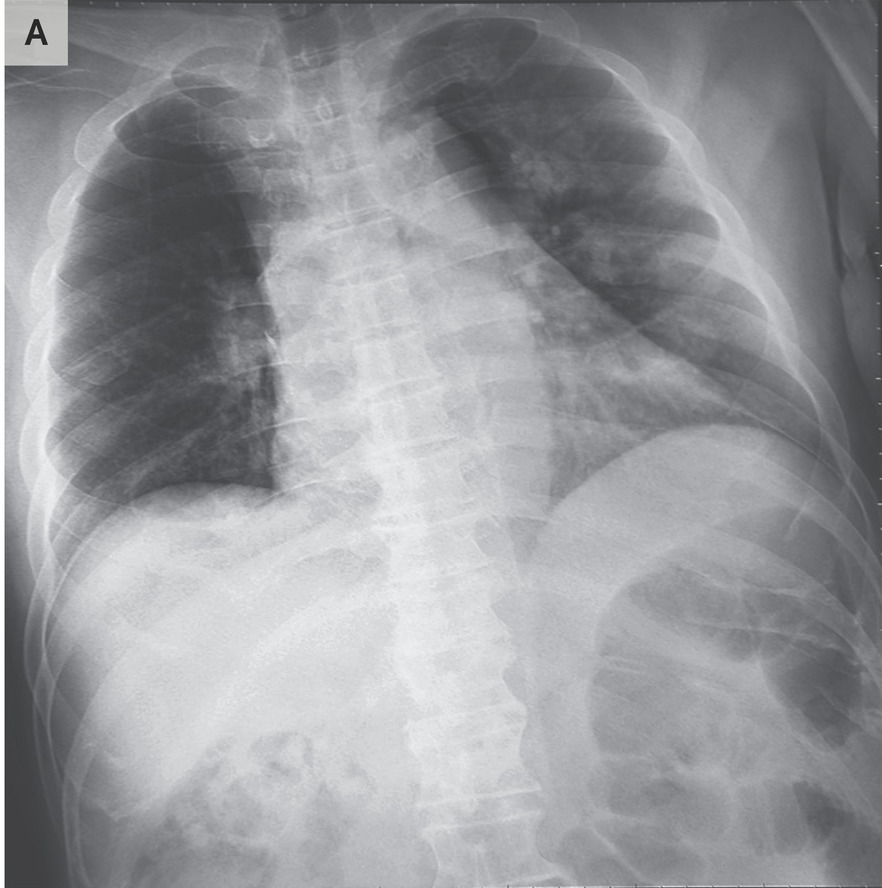

In [8]:
Image.open('Covid X-Ray/images/'+df['filename'][0])

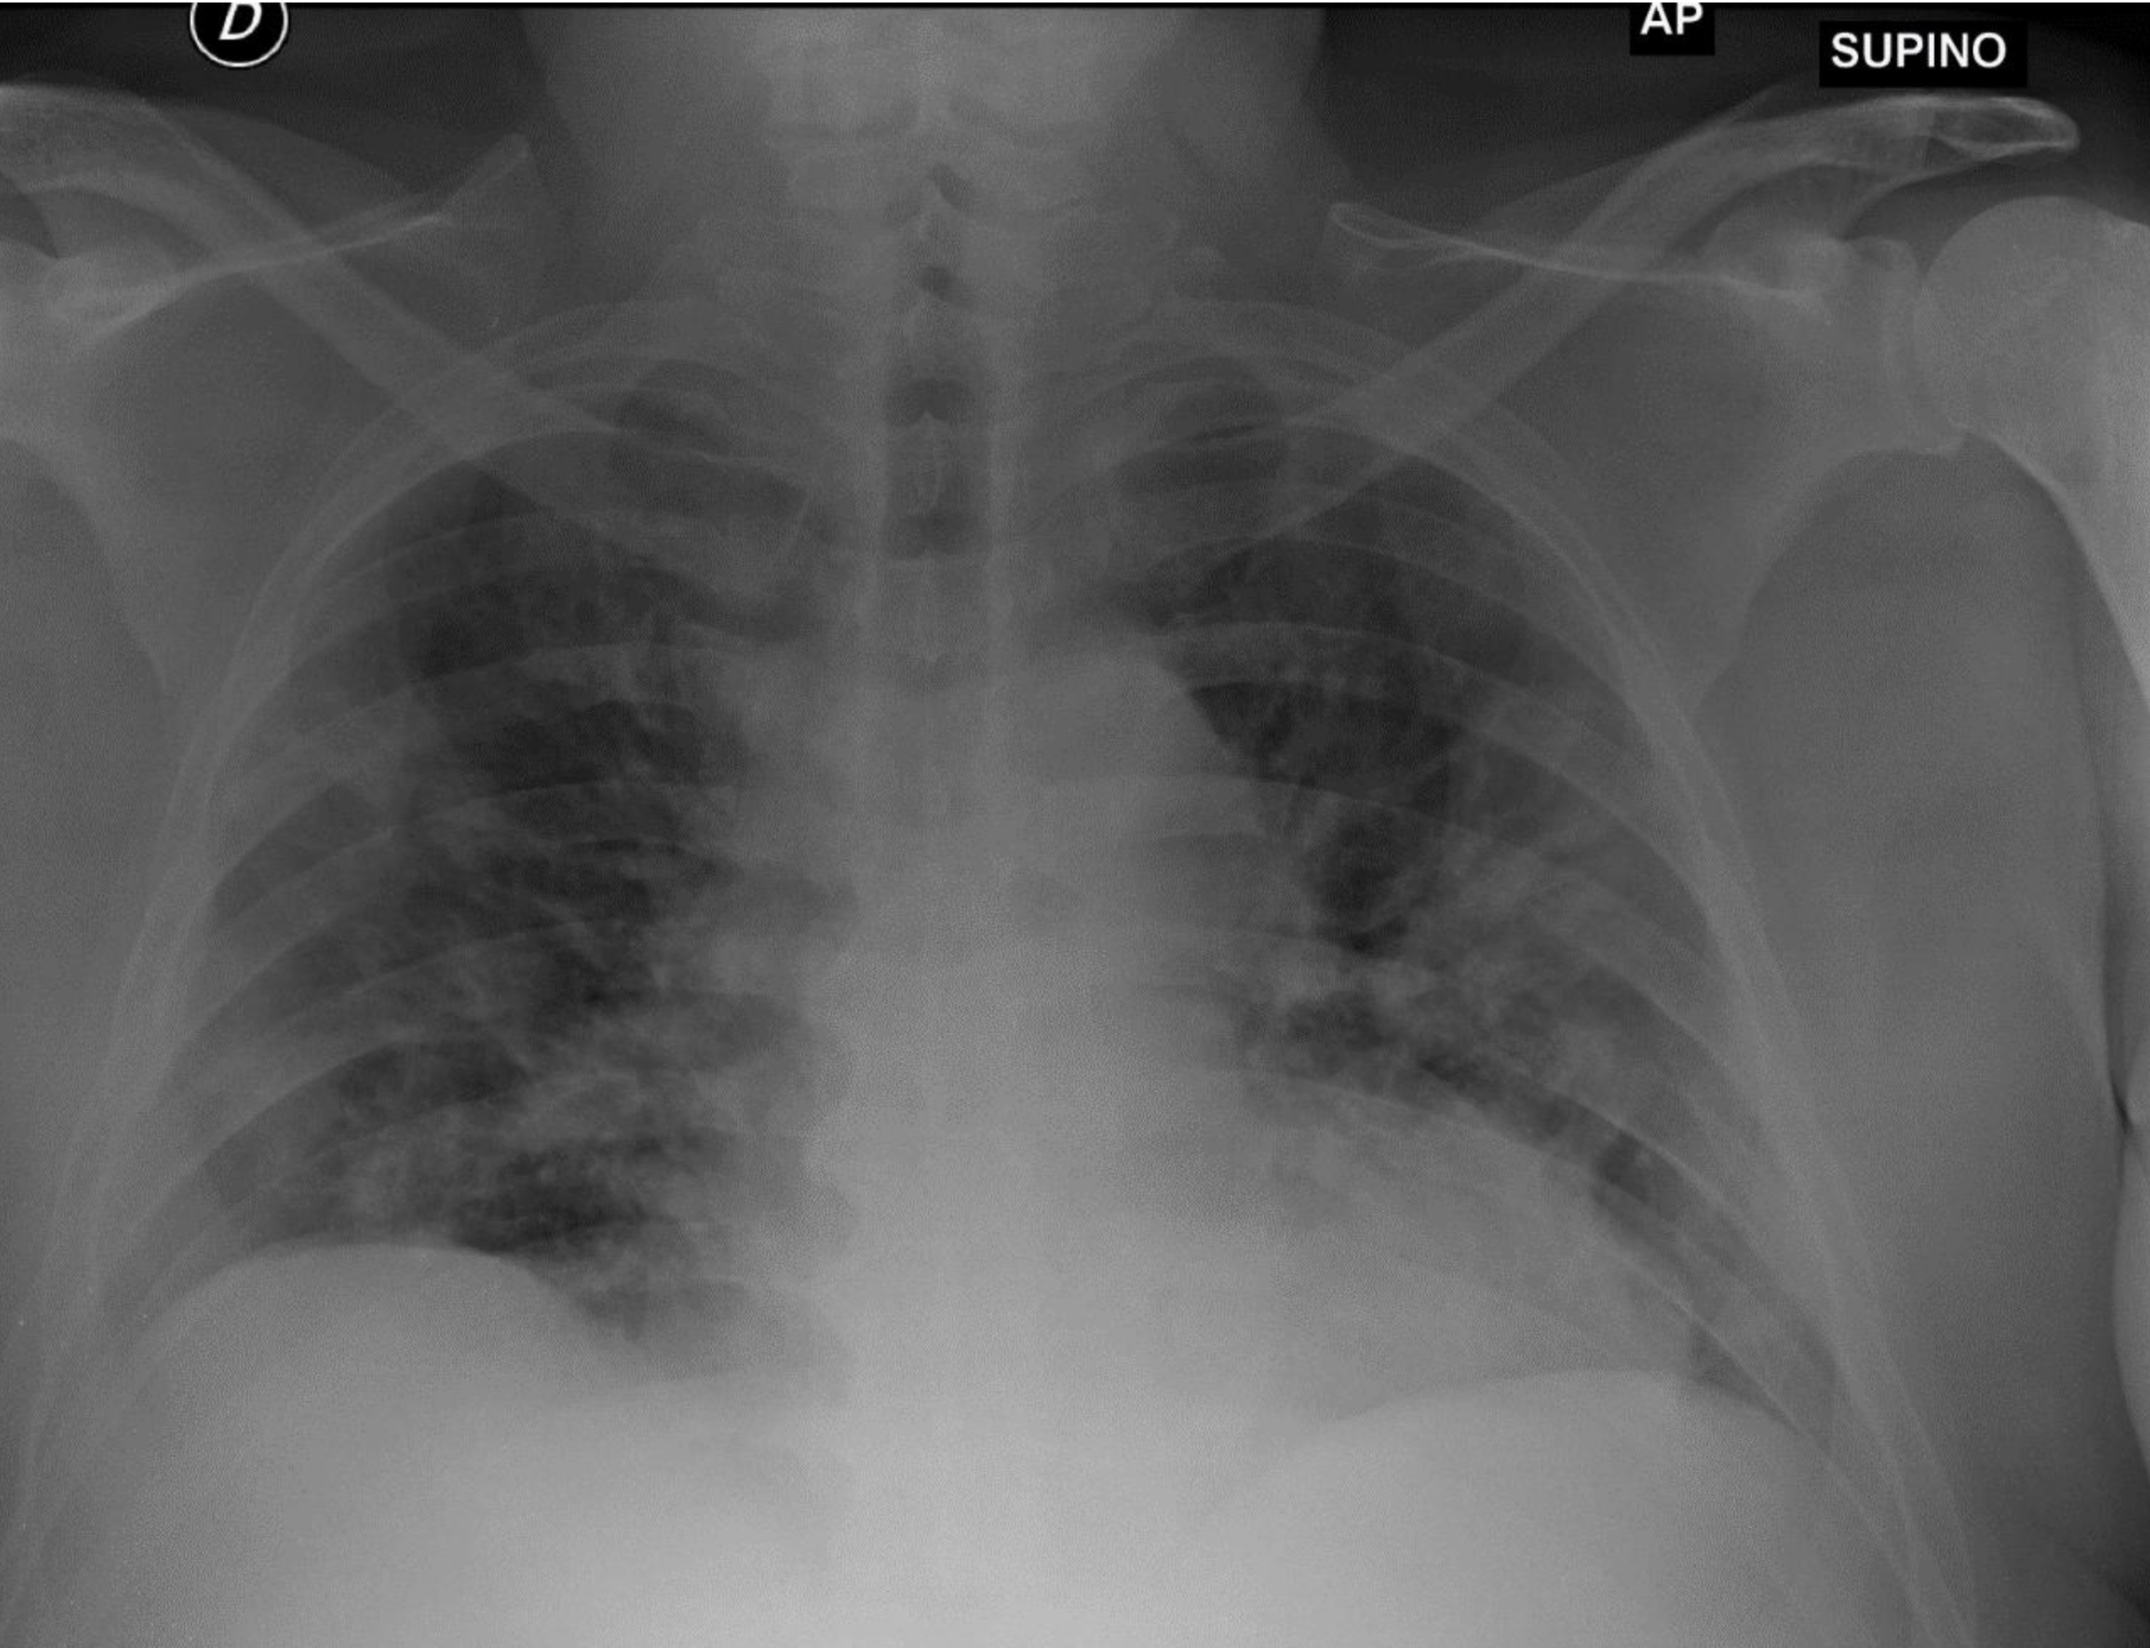

In [9]:
Image.open('Covid X-Ray/images/'+df['filename'][100])

In [10]:
train_images = []
train_labels = []

for i in range(len(df)):
    try:
        img = cv2.imread('Covid X-Ray/images/'+df['filename'].iloc[i])
        img = cv2.resize(img, (32,32))
        train_images.append(img)
        train_labels.append(df['finding'].iloc[i])
    except:
        print("unable to read_{}".format(i))

unable to read_53
unable to read_56
unable to read_226
unable to read_227
unable to read_228
unable to read_229
unable to read_230
unable to read_231
unable to read_232
unable to read_233
unable to read_234
unable to read_235
unable to read_236
unable to read_237
unable to read_238
unable to read_242
unable to read_243
unable to read_244
unable to read_245
unable to read_246
unable to read_247


In [11]:
len(train_images), len(train_labels)

(351, 351)

In [12]:
train_images = np.asarray(train_images)

In [13]:
train_images.shape

(351, 32, 32, 3)

In [14]:
train_images = train_images/255.

In [15]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [16]:
train_labels = np.reshape(train_labels, (-1,1))

In [17]:
train_labels = enc.fit_transform(train_labels).toarray()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, random_state=2, test_size=0.2)

In [19]:
y_train.shape, y_test.shape

((280, 11), (71, 11))

In [20]:
train_df = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10).batch(32)

In [21]:
class MyModel(Model):
    def __init__(self):
        super().__init__()
        self.conv1 = Conv2D(32, 3, padding = 'same', activation = 'relu')
        self.pool1 = MaxPool2D((2,2))
        self.conv2 = Conv2D(32, 3, padding = 'same', activation = 'relu')
        self.pool2 = MaxPool2D((2,2))
        self.flatten = Flatten()
        self.dense1 = Dense(256, activation = 'relu')
        self.dense2 = Dense(128, activation = 'relu')
        self.dense3 = Dense(11, activation = 'softmax')

    def call(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)

        return x

In [22]:
model = MyModel()

In [23]:
loss_object = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
train_loss = tf.keras.metrics.Mean(name = 'train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name = 'train_acc')

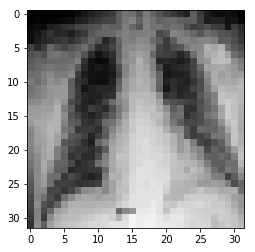

In [24]:
plt.imshow(X_train[1])

In [25]:
X_train.shape

(280, 32, 32, 3)

In [26]:
@tf.function
def train_step(image, label):
    with tf.GradientTape() as tape:
        prediction = model(image)
        loss = loss_object(label, prediction)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
        train_loss(loss)
        train_accuracy(label, prediction)

In [27]:
epochs = 100
for epoch in range(epochs):
    for image, label in train_df:
        train_step(image, label)
        
    print("epoch {}, loss {}, accuracy {}".format(epoch, train_loss.result(), train_accuracy.result()))
    train_loss.reset_states()
    train_accuracy.reset_states()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

epoch 0, loss 1.348362684249878, accuracy 0.7607142925262451
epoch 1, loss 1.030096411705017, accuracy 0.7857142686843872
epoch 2, loss 1.0141955614089966, accuracy 0.7857142686843872
epoch 3, loss 0.9398653507232666, accuracy 0.7857142686843872
epoch 4, loss 0.9464967250823975, accuracy 0.7857142686843872
epoch 5, loss 0.9338404536247253, accuracy 0.7857142686843872
epoch 6, loss 0.9028291702270508, accuracy 0.7857142686843872
epoch 7, loss 0.8825761079788208, accuracy 0.7857142686843872
epoch 8, loss 

In [28]:
pred = model.predict(X_test)

In [56]:
pred_0 = labels[np.argmax(pred[0])]

In [57]:
labels[np.argmax(y_test[0])]

'ARDS'

In [58]:
pred_0

'ARDS'

In [59]:
pred_1 = labels[np.argmax(pred[10])]

In [60]:
labels[np.argmax(y_test[10])]

'ARDS'

In [61]:
pred_1

'ARDS'

In [62]:
pred_3 = labels[np.argmax(pred[70])]
pred_3

'Klebsiella'

In [63]:
labels[np.argmax(y_test[70])]

'Klebsiella'